In [81]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import graphviz
import joblib
import scipy.stats as stats
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score

In [82]:
newdf = pd.read_csv('C:/Users/yomio/Downloads/weightlifting_721_workouts.csv')
newdf.head()

,Date,WorkoutName,ExerciseName,Set Order,Weight,Reps,Distance,Seconds,Notes,Workout Notes
0,10/23/2015 17:06,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,NaN,NaN
1,10/23/2015 17:06,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,NaN,NaN
2,10/23/2015 17:06,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,NaN,NaN
3,10/23/2015 17:06,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,NaN,NaN
4,10/23/2015 17:06,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,NaN,NaN


In [83]:
# Check for null values and feature datatypes
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9932 non-null   object 
 1   WorkoutName    9932 non-null   object 
 2   ExerciseName   9932 non-null   object 
 3   Set Order      9932 non-null   int64  
 4   Weight         9932 non-null   float64
 5   Reps           9932 non-null   int64  
 6   Distance       9932 non-null   float64
 7   Seconds        9932 non-null   int64  
 8   Notes          7 non-null      object 
 9   Workout Notes  3 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 776.1+ KB


In [84]:
newdf.isnull().sum()

Date                0
WorkoutName         0
ExerciseName        0
Set Order           0
Weight              0
Reps                0
Distance            0
Seconds             0
Notes            9925
Workout Notes    9929
dtype: int64

In [85]:
newdf.ExerciseName.unique()

array(['Incline Bench Press (Barbell)', 'Weighted dips',
       'Incline Bench Press', 'Squat (Barbell)', 'Leg press (hinge )',
       'Good Morning (Barbell)', 'Squat', 'Leg press', 'Good Morning',
       'Chin Up', 'Lat Pulldown', 'Seated Cable Row (close Grip)',
       'Rear delt fly', 'Seated Row', 'Hammer Curl',
       'Hammer Curl (Dumbbell )', 'Glute extension. ',
       'Seated Military Press', 'Seated Shoulder  Press (Barbell)',
       'Leg outward fly', 'Seated Military Press (Dumbbell)',
       'Lateral Raise', 'Seated Shoulder Press (Dumbbell)',
       'Lateral Raise (Dumbbells)', 'Bicep Curl (Barbell)', 'T-bar Row',
       'Incline Press (Dumbbell)', 'Tricep pushdown', 'Tricep Extension',
       'Bent Over Row (Dumbbell)', 'Leg curl', 'Cycling',
       'Military Press (Standing)', 'Shoulder Press (Standing)',
       'Deadlift (Barbell)', 'Deadlift', 'Hammer back row wide 45 angle',
       'Hammer lat pulldown', 'Rotator cuff work. ', 'Shrugs (dumbbell)',
       'Hammer sea

In [86]:
newdf.shape

(9932, 10)

In [87]:
# Both columns are removed as they data they contain is not required
newdf = newdf.drop(newdf.columns[[8,9]], axis=1)
newdf.describe()

,Set Order,Weight,Reps,Distance,Seconds
count,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000
mean,3.109847,171.967540,8.688884,0.089011,1.048429
std,1.986896,117.993654,3.092516,5.277076,29.424260
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,85.000000,6.000000,0.000000,0.000000
50%,3.000000,165.000000,8.000000,0.000000,0.000000
75%,4.000000,237.500000,10.000000,0.000000,0.000000
max,11.000000,2956.000000,60.000000,363.000000,1260.000000


<AxesSubplot:xlabel='Reps'>

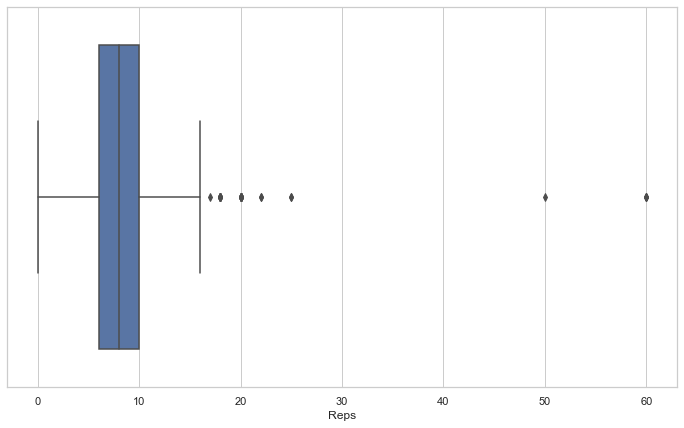

In [88]:
# emean, estd = mean(newdf), std(newdf)
# Boxplot to show the positions of outliers in the data. 
# The major outliers can be seen at extreme positions of the plot showing the variations
# in doing different types of exercises
sns.set_theme(style="whitegrid") 
fig, ax  = plt.subplots(figsize=(12, 7))
sns.boxplot(x=newdf['Reps'],ax=ax)

<AxesSubplot:xlabel='Reps', ylabel='Weight'>

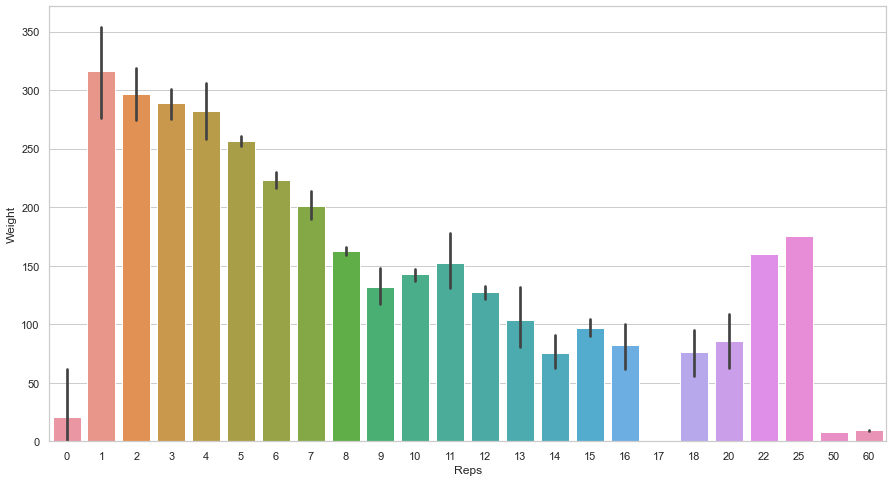

In [89]:
sns.set_theme(style="whitegrid")
fig, ax  = plt.subplots(figsize=(15,8))
sns.barplot(x=newdf['Reps'], y=newdf['Weight'])

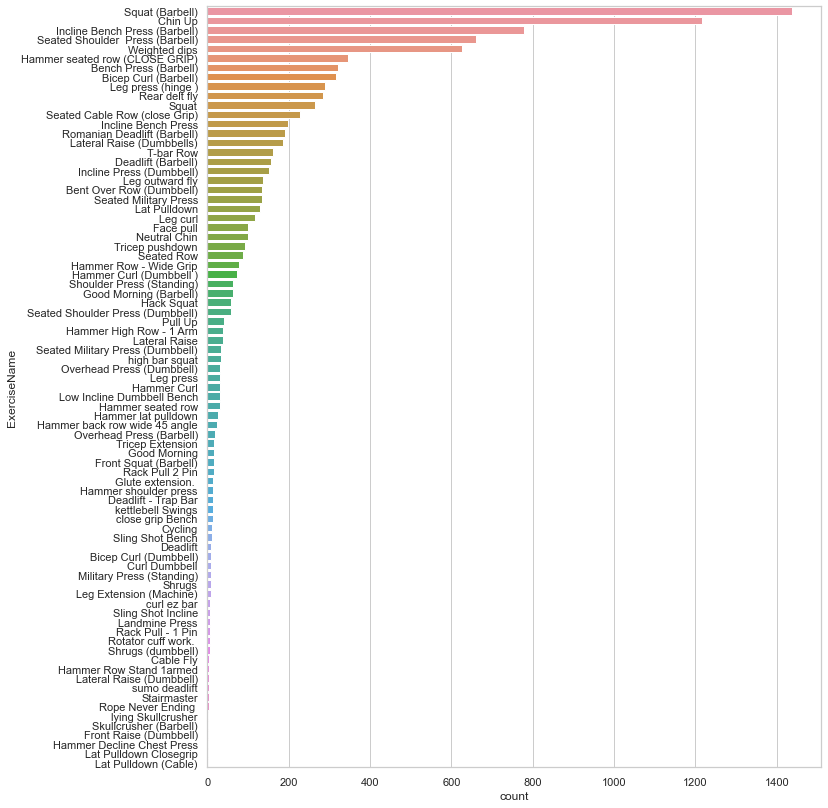

In [90]:
# barplot to view the count of each exercise 
counts = newdf.groupby(['ExerciseName']).agg(len)

sns.set_theme(style="whitegrid")
fig, ax  = plt.subplots(figsize=(11,14))

order = sns.countplot(y=newdf['ExerciseName'], order = newdf['ExerciseName'].value_counts().index)
plt.savefig("output.png")

<AxesSubplot:xlabel='ExerciseName', ylabel='Reps'>

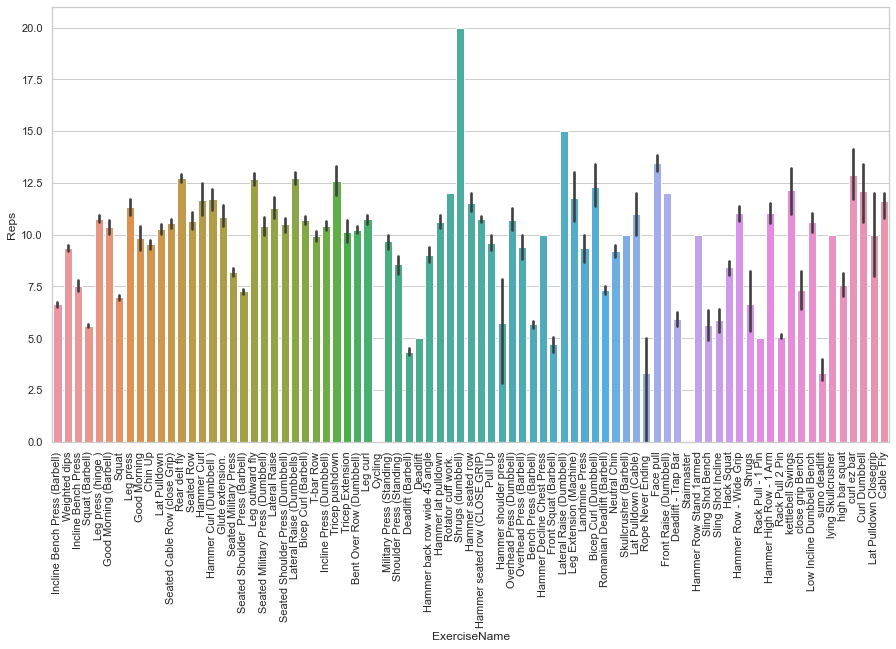

In [91]:
sns.set_theme(style="whitegrid")
fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 'vertical')
sns.barplot(y=newdf['Reps'], x=newdf['ExerciseName'])

<AxesSubplot:xlabel='ExerciseName', ylabel='Weight'>

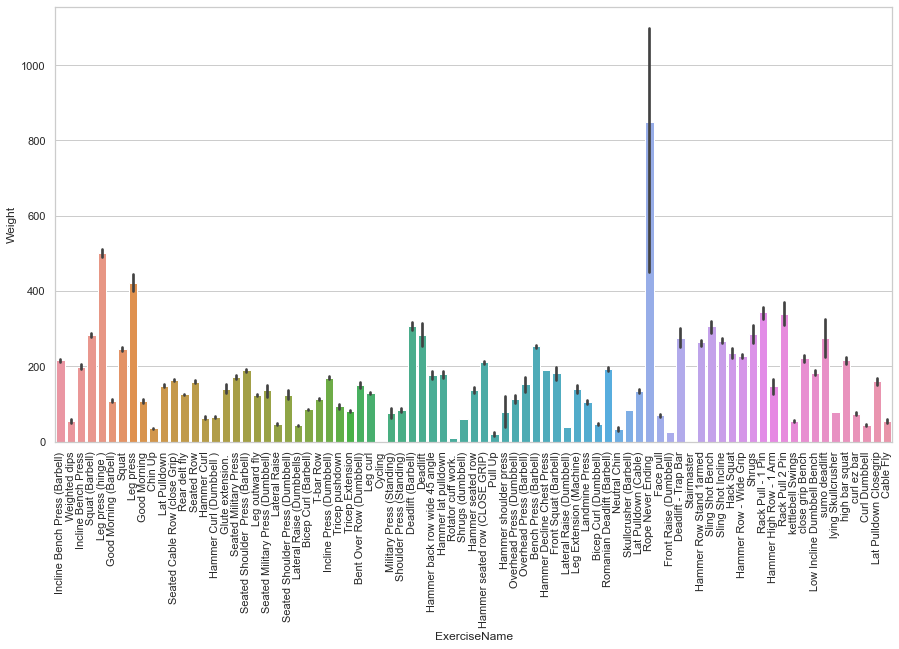

In [92]:
sns.set_theme(style="whitegrid")
fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 'vertical')
sns.barplot(x=newdf['ExerciseName'], y=newdf['Weight'])
# View the correlation between the exercises and weight amount carried using a barplot

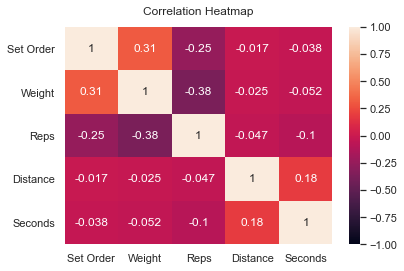

In [93]:
newdf.corr()
hmap = sns.heatmap(newdf.corr(), vmin=-1, vmax=1, annot=True)
hmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:xlabel='Weight', ylabel='Reps'>

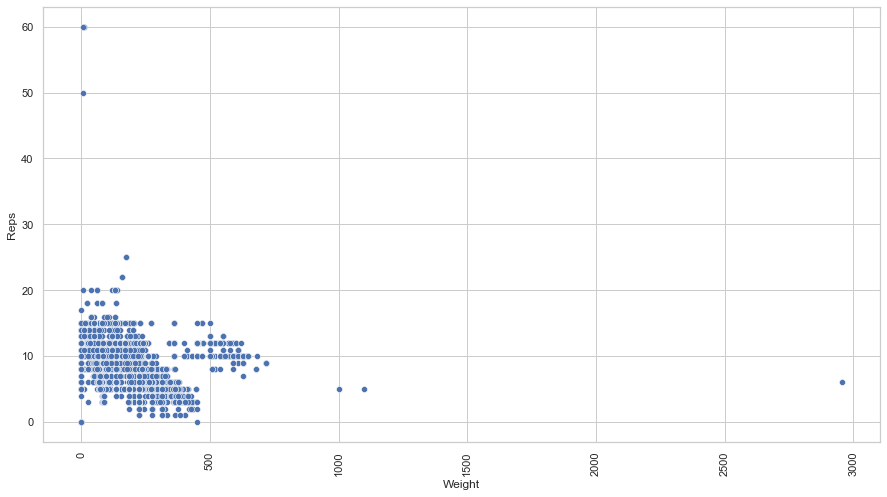

In [94]:
sns.set_theme(style="whitegrid")
fig, ax  = plt.subplots(figsize=(15,8))
plt.xticks(rotation = 'vertical')
sns.scatterplot(x=newdf['Weight'], y=newdf['Reps'])
# sns.scatterplot(data=newdf, x="Weight", y="Reps", hue="ExerciseName")

In [95]:
import time
import datetime
import dateutil.parser

newdf.Date = pd.to_datetime(newdf.Date)
date, time = zip(*[(d.date(), d.time()) for d in newdf['Date']])
newdf = newdf.assign(date=date, time=time)
# newdf['date'] = newdf['date'].map(datetime.datetime.toordinal)
newdf['date']
newdf

,Date,WorkoutName,ExerciseName,Set Order,Weight,Reps,Distance,Seconds,date,time
0,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,2015-10-23,17:06:00
1,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,2015-10-23,17:06:00
2,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,2015-10-23,17:06:00
3,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,2015-10-23,17:06:00
4,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,2015-10-23,17:06:00
...,...,...,...,...,...,...,...,...,...,...
9927,2018-09-29 14:35:00,Push - Incline #40,Low Incline Dumbbell Bench,2,170.0,12,0.0,0,2018-09-29,14:35:00
9928,2018-09-29 14:35:00,Push - Incline #40,Low Incline Dumbbell Bench,3,170.0,15,0.0,0,2018-09-29,14:35:00
9929,2018-09-29 14:35:00,Push - Incline #40,Lateral Raise (Dumbbells),1,50.0,15,0.0,0,2018-09-29,14:35:00
9930,2018-09-29 14:35:00,Push - Incline #40,Lateral Raise (Dumbbells),2,50.0,15,0.0,0,2018-09-29,14:35:00


In [96]:
newdf.date = pd.to_datetime(newdf.date)
newdf['year'] = newdf['date'].dt.year
newdf['month'] = newdf['date'].dt.month

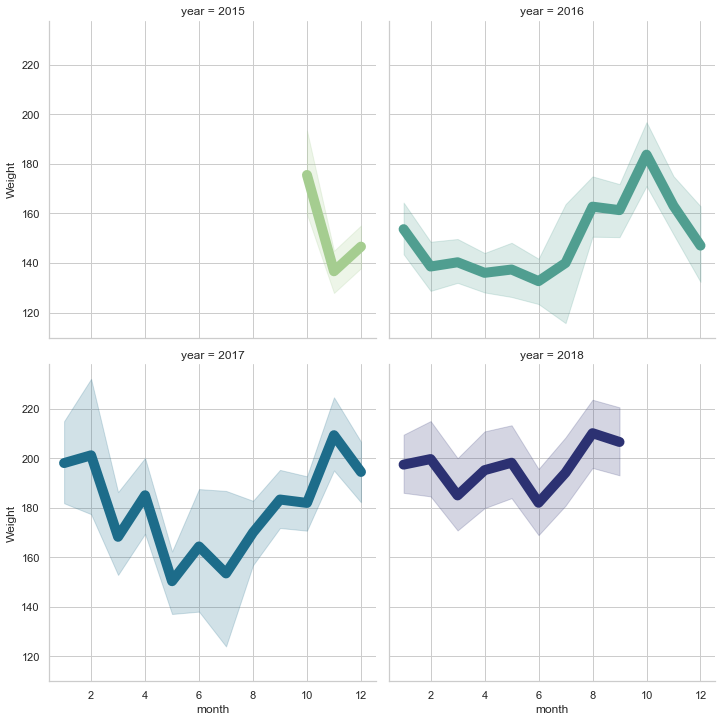

In [97]:
g = sns.relplot(
    x=newdf['month'], y=newdf['Weight'], col=newdf['year'], hue=newdf['year'],
    kind="line", palette="crest", linewidth=10, zorder=10,
    col_wrap=2, height=5, aspect=1, legend=False,
)
# Amounts of weights carried by month for each year the exercises were recorded.

In [98]:
# Histplot showing exercise count
# sns.set_theme(style="whitegrid")
# fig, ax  = plt.subplots(figsize=(14,14))
# sns.histplot(y=newdf['ExerciseName'])

In [99]:
newdf = newdf[newdf["ExerciseName"].str.contains("Rope Never Ending")==False]
newdf
print(newdf.shape)

(9929, 12)


In [100]:
newdf["BodyPart"] = ""
newdf['BodyPart']=newdf['WorkoutName']
newdf

,Date,WorkoutName,ExerciseName,Set Order,Weight,Reps,Distance,Seconds,date,time,year,month,BodyPart
0,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,2015-10-23,17:06:00,2015,10,Chest
1,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,2015-10-23,17:06:00,2015,10,Chest
2,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,2015-10-23,17:06:00,2015,10,Chest
3,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,2015-10-23,17:06:00,2015,10,Chest
4,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,2015-10-23,17:06:00,2015,10,Chest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,2018-09-29 14:35:00,Push - Incline #40,Low Incline Dumbbell Bench,2,170.0,12,0.0,0,2018-09-29,14:35:00,2018,9,Push - Incline #40
9928,2018-09-29 14:35:00,Push - Incline #40,Low Incline Dumbbell Bench,3,170.0,15,0.0,0,2018-09-29,14:35:00,2018,9,Push - Incline #40
9929,2018-09-29 14:35:00,Push - Incline #40,Lateral Raise (Dumbbells),1,50.0,15,0.0,0,2018-09-29,14:35:00,2018,9,Push - Incline #40
9930,2018-09-29 14:35:00,Push - Incline #40,Lateral Raise (Dumbbells),2,50.0,15,0.0,0,2018-09-29,14:35:00,2018,9,Push - Incline #40


In [101]:
#Place data in dictionaries to separate them into different respective groups
BODYPART_DICT = {
    'LEGS' : [
'Squat 1', 
'Legs',
'1 - Heavy Squats',
'Legs - 5x5 / Volume',
'2 Legs-high Reps',
'Legs - Heavy',
'Legs - Heavy #25', 
'Legs - Heavy #26',
'Legs - Heavy #27', 
'Legs - 5x5 / Volume #22', 
'Legs - Heavy #28',
'Squat Light #3',
'Squat Light #4',
'Squat Light #5',
'Squat Light #6',
'Squat Light #7',
'Squat Light #8',
'Squat Light #1', 
'Squat Light #2',
'Squat Light #10',
'Squat Light #11',
'Squat Light #12', 
'Legs - Heavy #29', 
'Legs - Heavy #30', 
'Legs - Heavy #31',
'Legs - 5x5 / Volume #23',
'Legs - Heavy #32',
'Legs - Heavy #33', 
'Legs - Heavy #34',],

'ARMS' : [
'Shoulder Day',
'Shoulders  - Heavy Day',
'2 - Shoulders ',
'Push - Shoulders / Bench',
'Push - Shoulders / Bench #34', 
'Push - Shoulders / Bench #35',
'Push - Shoulders / Bench #36', 
'Push - Incline #37',
'Push - Incline #38', 
'Push - Incline #39',
'Push - Incline #40',
'1 Incline Day',  
'1 Heavy   Rows', 
'Push - Incline', 
'Pulls ',
'Push - Incline #28',
'Push - Shoulders / Bench #25',
'Push - Incline #29', 
'Push - Shoulders / Bench #26', 
'Push - Shoulders / Bench #27', 
'Push - Incline #31',
'Push - Incline #36', 
'Push - Shoulders / Bench #33',
'Push - Shoulders / Bench #28',
'Push - Shoulders / Bench #29',
'Push - Incline #32', 
'Push - Incline #35',
'Push - Shoulders / Bench #30', 
'Pulls  #6',
'Push - Incline #34', 
'Push - Shoulders / Bench #32', 
'Push - Shoulders / Bench #31', 
'Push - Incline #33',
'Push - Incline #30',
],
    
'TRUNK':[
'Chest',
'Back', 
'Back Heavier Chins',
'Back Day 1 #4',
'Back- Heavy 3x8 Chins #6',
'Back Day 1 #3',
'Back Workout',
'Back- Heavy 3x8 Chins #7', 
'Back With Deadlift',
'2 - Back Heavy Chins',
'Back - Heavier Chins',      
'Back - Chins.  5x6',
'Back - Light Chins, 8-10 Reps',
'Back Day 1 #2', 
'Back - Pyramid.  5max, Decrease 5 Sets #23',
'Back - Pyramid.  5max, Decrease 5 Sets',
'Back Day 1 #1', 
'Back - Pyramid.  5max, Decrease 5 Sets #26', 
'Back - Pyramid.  5max, Decrease 5 Sets #22',
'Back - Pyramid.  5max, Decrease 5 Sets #24',
'Back- Heavy 3x8 Chins #1', 
'Back - Light Chins, 8-10 Reps #20',
'Back - Pyramid.  5max, Decrease 5 Sets #25', 
'Back - Light Chins, 8-10 Reps #21', 
'Back - Light Chins, 8-10 Reps #22', 
'Back- Heavy 3x8 Chins #2',
'Back - Light Chins, 8-10 Reps #23', 
'Back- Heavy 3x8 Chins #3',
'Back- Heavy 3x8 Chins #4',
'Back - Light Chins, 8-10 Reps #24', 
'Back- Heavy 3x8 Chins #5', 
'Back Easy #1', 
]
}

    

In [102]:
def get_bodyparts(a_df): 
    for category, pos_list in BODYPART_DICT.items():
        if a_df in pos_list:
            return category

In [103]:
newdf['BodyPart'] = newdf['WorkoutName'].apply(get_bodyparts)

In [104]:
newdf

,Date,WorkoutName,ExerciseName,Set Order,Weight,Reps,Distance,Seconds,date,time,year,month,BodyPart
0,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
1,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
2,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
3,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
4,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,2018-09-29 14:35:00,Push - Incline #40,Low Incline Dumbbell Bench,2,170.0,12,0.0,0,2018-09-29,14:35:00,2018,9,ARMS
9928,2018-09-29 14:35:00,Push - Incline #40,Low Incline Dumbbell Bench,3,170.0,15,0.0,0,2018-09-29,14:35:00,2018,9,ARMS
9929,2018-09-29 14:35:00,Push - Incline #40,Lateral Raise (Dumbbells),1,50.0,15,0.0,0,2018-09-29,14:35:00,2018,9,ARMS
9930,2018-09-29 14:35:00,Push - Incline #40,Lateral Raise (Dumbbells),2,50.0,15,0.0,0,2018-09-29,14:35:00,2018,9,ARMS


In [105]:
# pd.set_option('display.max_rows', None)
# temp = newdf[['ExerciseName','BodyPart']]
# temp.to_csv('C:/Users/yomio/Downloads/temp.csv', index = False)

## Reducing sample size

In [106]:
newdf.isna().sum()

Date            0
WorkoutName     0
ExerciseName    0
Set Order       0
Weight          0
Reps            0
Distance        0
Seconds         0
date            0
time            0
year            0
month           0
BodyPart        0
dtype: int64

In [107]:
adf = newdf['ExerciseName'].value_counts(sort=True) 

In [108]:
add = pd.DataFrame(data=adf)
add = add.reset_index() 

In [109]:
add

,index,ExerciseName
0,Squat (Barbell),1437
1,Chin Up,1217
2,Incline Bench Press (Barbell),779
3,Seated Shoulder Press (Barbell),660
4,Weighted dips,627
...,...,...
75,lying Skullcrusher,2
76,Lat Pulldown Closegrip,2
77,Hammer Decline Chest Press,2
78,Lat Pulldown (Cable),2


In [110]:
new_add = add[add.ExerciseName >= 10]
new_add

,index,ExerciseName
0,Squat (Barbell),1437
1,Chin Up,1217
2,Incline Bench Press (Barbell),779
3,Seated Shoulder Press (Barbell),660
4,Weighted dips,627
...,...,...
56,Sling Shot Bench,11
57,Curl Dumbbell,10
58,Military Press (Standing),10
59,Deadlift,10


In [111]:
values_we_need = new_add['index'].unique()

In [112]:
print(values_we_need)

['Squat (Barbell)' 'Chin Up' 'Incline Bench Press (Barbell)'
 'Seated Shoulder  Press (Barbell)' 'Weighted dips'
 'Hammer seated row (CLOSE GRIP)' 'Bench Press (Barbell)'
 'Bicep Curl (Barbell)' 'Leg press (hinge )' 'Rear delt fly' 'Squat'
 'Seated Cable Row (close Grip)' 'Incline Bench Press'
 'Romanian Deadlift (Barbell)' 'Lateral Raise (Dumbbells)' 'T-bar Row'
 'Deadlift (Barbell)' 'Incline Press (Dumbbell)' 'Leg outward fly'
 'Bent Over Row (Dumbbell)' 'Seated Military Press' 'Lat Pulldown'
 'Leg curl' 'Face pull' 'Neutral Chin' 'Tricep pushdown' 'Seated Row'
 'Hammer Row - Wide Grip' 'Hammer Curl (Dumbbell )'
 'Shoulder Press (Standing)' 'Good Morning (Barbell)' 'Hack Squat'
 'Seated Shoulder Press (Dumbbell)' 'Pull Up' 'Hammer High Row - 1 Arm'
 'Lateral Raise' 'high bar squat' 'Seated Military Press (Dumbbell)'
 'Overhead Press (Dumbbell)' 'Leg press' 'Hammer Curl' 'Hammer seated row'
 'Low Incline Dumbbell Bench' 'Hammer lat pulldown'
 'Hammer back row wide 45 angle' 'Overhead 

In [113]:
newdff = newdf[newdf['ExerciseName'].isin(values_we_need)]

In [114]:
print(newdf.shape)
print(newdff.shape)

(9929, 13)
(9843, 13)


## TRAINING AND TEST DATA

In [115]:
new = newdff.drop(newdff.columns[[0,1,2,3,6,7,8,9,10,11]], axis=1)

X = pd.get_dummies(new)
y = newdff.ExerciseName

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [116]:
newdff

,Date,WorkoutName,ExerciseName,Set Order,Weight,Reps,Distance,Seconds,date,time,year,month,BodyPart
0,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
1,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
2,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
3,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
4,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,2018-09-29 14:35:00,Push - Incline #40,Low Incline Dumbbell Bench,2,170.0,12,0.0,0,2018-09-29,14:35:00,2018,9,ARMS
9928,2018-09-29 14:35:00,Push - Incline #40,Low Incline Dumbbell Bench,3,170.0,15,0.0,0,2018-09-29,14:35:00,2018,9,ARMS
9929,2018-09-29 14:35:00,Push - Incline #40,Lateral Raise (Dumbbells),1,50.0,15,0.0,0,2018-09-29,14:35:00,2018,9,ARMS
9930,2018-09-29 14:35:00,Push - Incline #40,Lateral Raise (Dumbbells),2,50.0,15,0.0,0,2018-09-29,14:35:00,2018,9,ARMS


In [117]:
X

,Weight,Reps,BodyPart_ARMS,BodyPart_LEGS,BodyPart_TRUNK
0,135.0,8,0,0,1
1,135.0,8,0,0,1
2,135.0,5,0,0,1
3,185.0,7,0,0,1
4,230.0,8,0,0,1
...,...,...,...,...,...
9927,170.0,12,1,0,0
9928,170.0,15,1,0,0
9929,50.0,15,1,0,0
9930,50.0,15,1,0,0


In [118]:
y

0       Incline Bench Press (Barbell)
1       Incline Bench Press (Barbell)
2       Incline Bench Press (Barbell)
3       Incline Bench Press (Barbell)
4       Incline Bench Press (Barbell)
                    ...              
9927       Low Incline Dumbbell Bench
9928       Low Incline Dumbbell Bench
9929        Lateral Raise (Dumbbells)
9930        Lateral Raise (Dumbbells)
9931        Lateral Raise (Dumbbells)
Name: ExerciseName, Length: 9843, dtype: object

## MODELING

In [119]:
import warnings
warnings.filterwarnings("ignore")

In [120]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
cl1 = DecisionTreeClassifier(random_state=0)
param_cl = {'min_samples_split': [2,4,6],
            'max_depth': [10,20],
            'min_samples_leaf': [1,3,5],
            }
scorer = make_scorer(accuracy_score)
random = RandomizedSearchCV(cl1, 
                            param_cl,
                            cv=3,
                            n_jobs=-1,
                            scoring=scorer,
                            verbose=1)

clf = random.fit(X_train,y_train)
best_clf = clf.best_estimator_
clf.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


DecisionTreeClassifier(max_depth=10, random_state=0)

In [121]:
y_pred = best_clf.predict(X_test)
print(f"Classification report for Decision Tree Classifier:\n"
     f"{metrics.classification_report(y_test, y_pred)}\n"
    f"{metrics.precision_recall_fscore_support(y_test, y_pred, average='weighted')}\n")

Classification report for Decision Tree Classifier:
                                  precision    recall  f1-score   support

           Bench Press (Barbell)       0.66      0.58      0.62        71
        Bent Over Row (Dumbbell)       0.47      0.30      0.37        53
            Bicep Curl (Barbell)       0.59      0.85      0.70        93
           Bicep Curl (Dumbbell)       0.00      0.00      0.00         1
                         Chin Up       0.76      0.98      0.85       356
                   Curl Dumbbell       0.00      0.00      0.00         4
                         Cycling       1.00      1.00      1.00         2
                        Deadlift       0.00      0.00      0.00         2
              Deadlift (Barbell)       0.52      0.36      0.43        36
             Deadlift - Trap Bar       0.00      0.00      0.00         7
                       Face pull       0.53      0.61      0.56        33
           Front Squat (Barbell)       0.20      0.33      

In [122]:
cross_val_score(clf, X_train,y_train, cv=3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


array([0.64562473, 0.62603396, 0.63719512])

In [123]:
rfc = RandomForestClassifier(random_state=0)
param_rfc = {'min_samples_split': [2,4,6],
            'max_depth': [10,20],
            'min_samples_leaf': [1,3,5]
            }
scorer = make_scorer(accuracy_score)
rfmodel = RandomizedSearchCV(rfc,
                            param_rfc,
                             cv=3,
                            scoring=scorer,
                            n_jobs=-1)

clrf = rfmodel.fit(X_train,y_train)
best_rfc = clrf.best_estimator_
clrf.best_estimator_

RandomForestClassifier(max_depth=10, random_state=0)

In [124]:
y_pred = best_rfc.predict(X_test)
print(f"Classification report for Random Forest Classifier:\n"
     f"{metrics.classification_report(y_test, y_pred)}\n"
     f"{metrics.precision_recall_fscore_support(y_test, y_pred, average='weighted')}\n")


Classification report for Random Forest Classifier:
                                  precision    recall  f1-score   support

           Bench Press (Barbell)       0.72      0.66      0.69        71
        Bent Over Row (Dumbbell)       0.75      0.06      0.11        53
            Bicep Curl (Barbell)       0.56      0.88      0.69        93
           Bicep Curl (Dumbbell)       0.00      0.00      0.00         1
                         Chin Up       0.77      0.97      0.86       356
                   Curl Dumbbell       0.00      0.00      0.00         4
                         Cycling       1.00      1.00      1.00         2
                        Deadlift       0.00      0.00      0.00         2
              Deadlift (Barbell)       0.73      0.31      0.43        36
             Deadlift - Trap Bar       0.00      0.00      0.00         7
                       Face pull       0.54      0.64      0.58        33
           Front Squat (Barbell)       0.00      0.00      

In [125]:
cross_val_score(rfc, X_train,y_train, cv=3)

array([0.65259034, 0.63474097, 0.6358885 ])

In [126]:
xgb = XGBClassifier()
param_xgb = { 'max_depth': [10,20],
            "learning_rate": [0.1, 0.5, 1],
            }
scorer = make_scorer(accuracy_score)
xgmodel = RandomizedSearchCV(xgb,
                            param_xgb,
                            scoring=scorer,
                            n_jobs=-1,
                            verbose=1)

clxgb = xgmodel.fit(X_train,y_train)
best_xgb = clxgb.best_estimator_
clxgb.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[16:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
y_pred = best_xgb.predict(X_test)
print(f"Classification report for XGBOOST Classifier :\n"
     f"{metrics.classification_report(y_test, y_pred)}\n"
f"{metrics.precision_recall_fscore_support(y_test, y_pred, average='weighted')}\n")

Classification report for XGBOOST Classifier :
                                  precision    recall  f1-score   support

           Bench Press (Barbell)       0.69      0.68      0.68        71
        Bent Over Row (Dumbbell)       0.67      0.15      0.25        53
            Bicep Curl (Barbell)       0.58      0.88      0.70        93
           Bicep Curl (Dumbbell)       0.00      0.00      0.00         1
                         Chin Up       0.79      0.96      0.87       356
                   Curl Dumbbell       0.00      0.00      0.00         4
                         Cycling       1.00      1.00      1.00         2
                        Deadlift       0.00      0.00      0.00         2
              Deadlift (Barbell)       0.61      0.31      0.41        36
             Deadlift - Trap Bar       0.00      0.00      0.00         7
                       Face pull       0.60      0.73      0.66        33
           Front Squat (Barbell)       0.00      0.00      0.00 

In [128]:
cross_val_score(xgb, X_train,y_train, cv=3)

[16:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.65476709, 0.64127122, 0.646777  ])

In [129]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.utils import shuffle

y2 = shuffle(y, random_state=1)
y3 = shuffle(y, random_state=2)
Y = np.vstack((y, y2, y3)).T
n_outputs = Y.shape[1]

mtarget = MultiOutputClassifier(best_xgb, n_jobs=-1)
mtarget.fit(X, Y).predict(X)

y_pred = mtarget.predict(X)
# print(y_pred)


In [130]:
Y

array([['Incline Bench Press (Barbell)',
        'Seated Shoulder  Press (Barbell)',
        'Seated Shoulder  Press (Barbell)'],
       ['Incline Bench Press (Barbell)', 'Bench Press (Barbell)',
        'Incline Bench Press (Barbell)'],
       ['Incline Bench Press (Barbell)', 'Chin Up',
        'Bicep Curl (Barbell)'],
       ...,
       ['Lateral Raise (Dumbbells)', 'Leg press',
        'Hammer seated row (CLOSE GRIP)'],
       ['Lateral Raise (Dumbbells)', 'Weighted dips',
        'Incline Bench Press'],
       ['Lateral Raise (Dumbbells)', 'Glute extension. ',
        'Bench Press (Barbell)']], dtype=object)

In [131]:
file = 'mtarget.pkl'
joblib.dump(mtarget, file, compress=1)
print(f"{file}")

mtarget.pkl


## REGRESSION MODELS

In [132]:
newdf

,Date,WorkoutName,ExerciseName,Set Order,Weight,Reps,Distance,Seconds,date,time,year,month,BodyPart
0,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),1,135.0,8,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
1,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),2,135.0,8,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
2,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),3,135.0,5,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
3,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),4,185.0,7,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
4,2015-10-23 17:06:00,Chest,Incline Bench Press (Barbell),5,230.0,8,0.0,0,2015-10-23,17:06:00,2015,10,TRUNK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,2018-09-29 14:35:00,Push - Incline #40,Low Incline Dumbbell Bench,2,170.0,12,0.0,0,2018-09-29,14:35:00,2018,9,ARMS
9928,2018-09-29 14:35:00,Push - Incline #40,Low Incline Dumbbell Bench,3,170.0,15,0.0,0,2018-09-29,14:35:00,2018,9,ARMS
9929,2018-09-29 14:35:00,Push - Incline #40,Lateral Raise (Dumbbells),1,50.0,15,0.0,0,2018-09-29,14:35:00,2018,9,ARMS
9930,2018-09-29 14:35:00,Push - Incline #40,Lateral Raise (Dumbbells),2,50.0,15,0.0,0,2018-09-29,14:35:00,2018,9,ARMS


In [133]:
# def root_mean_squared_error(y_true, y_pred):
#     """Root mean squared error regression loss"""
#     return np.sqrt(mean_squared_error(y_true, y_pred))

In [134]:
new2 = newdff.drop(newdff.columns[[0,1,3,4,5,6,7,8,9,10,11,12]], axis=1)
X2 = new2

In [135]:
X2

,ExerciseName
0,Incline Bench Press (Barbell)
1,Incline Bench Press (Barbell)
2,Incline Bench Press (Barbell)
3,Incline Bench Press (Barbell)
4,Incline Bench Press (Barbell)
...,...
9927,Low Incline Dumbbell Bench
9928,Low Incline Dumbbell Bench
9929,Lateral Raise (Dumbbells)
9930,Lateral Raise (Dumbbells)


In [136]:
X2['ExerciseName'].unique()

array(['Incline Bench Press (Barbell)', 'Weighted dips',
       'Incline Bench Press', 'Squat (Barbell)', 'Leg press (hinge )',
       'Good Morning (Barbell)', 'Squat', 'Leg press', 'Good Morning',
       'Chin Up', 'Lat Pulldown', 'Seated Cable Row (close Grip)',
       'Rear delt fly', 'Seated Row', 'Hammer Curl',
       'Hammer Curl (Dumbbell )', 'Glute extension. ',
       'Seated Military Press', 'Seated Shoulder  Press (Barbell)',
       'Leg outward fly', 'Seated Military Press (Dumbbell)',
       'Lateral Raise', 'Seated Shoulder Press (Dumbbell)',
       'Lateral Raise (Dumbbells)', 'Bicep Curl (Barbell)', 'T-bar Row',
       'Incline Press (Dumbbell)', 'Tricep pushdown', 'Tricep Extension',
       'Bent Over Row (Dumbbell)', 'Leg curl', 'Cycling',
       'Military Press (Standing)', 'Shoulder Press (Standing)',
       'Deadlift (Barbell)', 'Deadlift', 'Hammer back row wide 45 angle',
       'Hammer lat pulldown', 'Hammer seated row',
       'Hammer seated row (CLOSE GRIP)', 

In [137]:
X2 = pd.get_dummies(X2)
y2 = newdff[['Weight', 'Set Order', 'Reps']]

In [138]:
X2

,ExerciseName_Bench Press (Barbell),ExerciseName_Bent Over Row (Dumbbell),ExerciseName_Bicep Curl (Barbell),ExerciseName_Bicep Curl (Dumbbell),ExerciseName_Chin Up,ExerciseName_Curl Dumbbell,ExerciseName_Cycling,ExerciseName_Deadlift,ExerciseName_Deadlift (Barbell),ExerciseName_Deadlift - Trap Bar,...,ExerciseName_Sling Shot Bench,ExerciseName_Squat,ExerciseName_Squat (Barbell),ExerciseName_T-bar Row,ExerciseName_Tricep Extension,ExerciseName_Tricep pushdown,ExerciseName_Weighted dips,ExerciseName_close grip Bench,ExerciseName_high bar squat,ExerciseName_kettlebell Swings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
y2

,Weight,Set Order,Reps
0,135.0,1,8
1,135.0,2,8
2,135.0,3,5
3,185.0,4,7
4,230.0,5,8
...,...,...,...
9927,170.0,2,12
9928,170.0,3,15
9929,50.0,1,15
9930,50.0,2,15


In [140]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

s1 = RandomForestRegressor() 

model = s1.fit(X2_train,y2_train)
res = model.predict(X2_train)
result = model.predict(X2_test)

In [141]:
from sklearn.metrics import mean_squared_error
rf_rmse = np.sqrt(mean_squared_error(y2_train, res))
rf_rmse

32.03312059503637

In [142]:
from sklearn.metrics import mean_squared_error
rf_rmse = np.sqrt(mean_squared_error(y2_test, result))
rf_rmse

26.38557050551445

In [143]:
from sklearn.metrics import mean_squared_error
rf_rmse = np.sqrt(mean_squared_error(y2_test, result))
rf_rmse

26.38557050551445

In [144]:
# import statsmodels.api as sm

# model = sm.OLS(X2_train,y2_train).fit()
# predictions = model.predict(y2_test)

# print_model = model.summary()
# print(predictions)

In [145]:
from sklearn.tree import DecisionTreeRegressor

s2 = DecisionTreeRegressor() 

X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
model = s2.fit(X2_train,y2_train)
result2 = model.predict(X2_test)

In [146]:
dtr_rmse = np.sqrt(mean_squared_error(y2_test, result2))
dtr_rmse

26.37777987251562

In [147]:
file = 'modelrg.pkl'
joblib.dump(s1, file, compress=1)
print(f"{file}")

modelrg.pkl
